# Sentiment Analysis with IMDB dataset
## 1. Data load
### zipfile

To unzip files, we have to define file name as list and use loop.

In [ ]:
import zipfile

file_path = "C:/Python/NLP/Chap_4/"

file_list = ['word2vec-nlp-tutorial.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(file_path + file, 'r')
    zipRef.extractall(file_path)
    zipRef.close()

## 2. EDA

- Data size
- Number of data
- Distribution of length
- Most used word
- neg & pos distribution
- Distribution of number of each word
- Ratio of capital, small letter and special character.

In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
%matplotlib inline

train_data = pd.read_csv(file_path+'labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)

# delimiter = \t. It's tsv file
# header = 0. It already has its header
# quoting = 3. To ignore quotation mark

In [19]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### 2.1 Size

In [20]:
for file in os.listdir(file_path):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(file_path + file) / 1000000, 2)) + 'MB')

labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


### 2.2 Number of train data

In [69]:
print("Number of train data: {}".format(len(train_data)))

Number of train data: 25000


In [74]:
train_data['review'].head()

0    "With all this stuff going down at the moment ...
1    "\"The Classic War of the Worlds\" by Timothy ...
2    "The film starts with a manager (Nicholas Bell...
3    "It must be assumed that those who praised thi...
4    "Superbly trashy and wondrously unpretentious ...
Name: review, dtype: object

### 2.3 Distribution of length

In [25]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number')

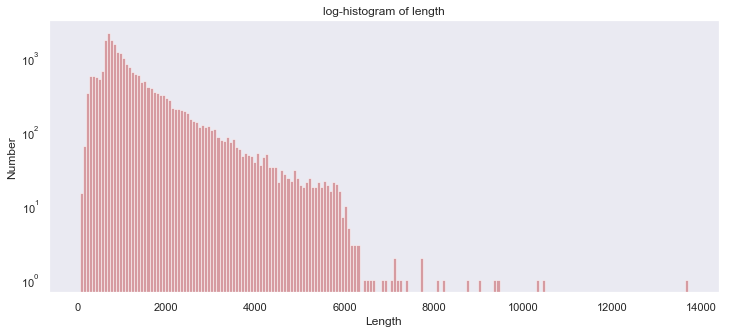

In [34]:
# Graph size
plt.figure(figsize=(12, 5))

plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')

plt.yscale('log', nonposy='clip')

plt.title('log-histogram of length')
plt.xlabel('Length')
plt.ylabel('Number')




##### Other statistics & Box plot

In [41]:
print('Max: {}'.format(np.max(train_length)))
print('Min: {}'.format(np.min(train_length)))
print('Mean: {:.2f}'.format(np.mean(train_length)))
print('Median: {}'.format(np.median(train_length)))
print('Std: {:.2f}'.format(np.std(train_length)))

print('1th quantile: {}'.format(np.percentile(train_length, 25)))
print('3th quantile: {}'.format(np.percentile(train_length, 75)))

Max: 13710
Min: 54
Mean: 1329.71
Median: 983.0
Std: 1005.22
1th quantile: 705.0
3th quantile: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x24a01756b00>,
 'caps': [<matplotlib.lines.Line2D at 0x24a01759278>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a01756978>],
 'medians': [<matplotlib.lines.Line2D at 0x24a01759978>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a0174b080>],
 'means': [<matplotlib.lines.Line2D at 0x24a01759cf8>]}

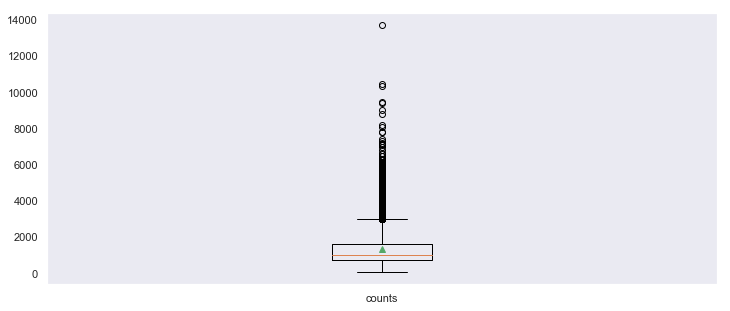

In [44]:
plt.figure(figsize=(12,5))

plt.boxplot(train_length, labels=['counts'], showmeans=True)

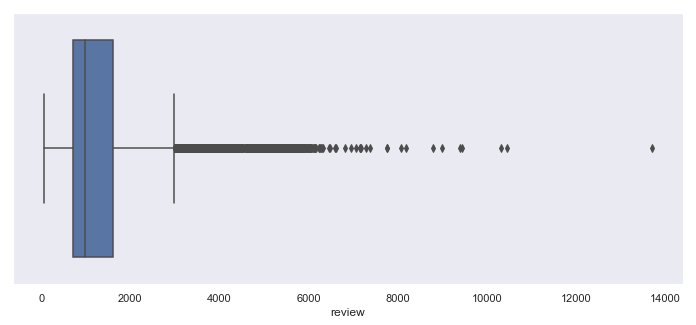

In [45]:
plt.figure(figsize=(12,5))
sns.boxplot(train_length)

### 2.4 Most used word

(-0.5, 799.5, 599.5, -0.5)

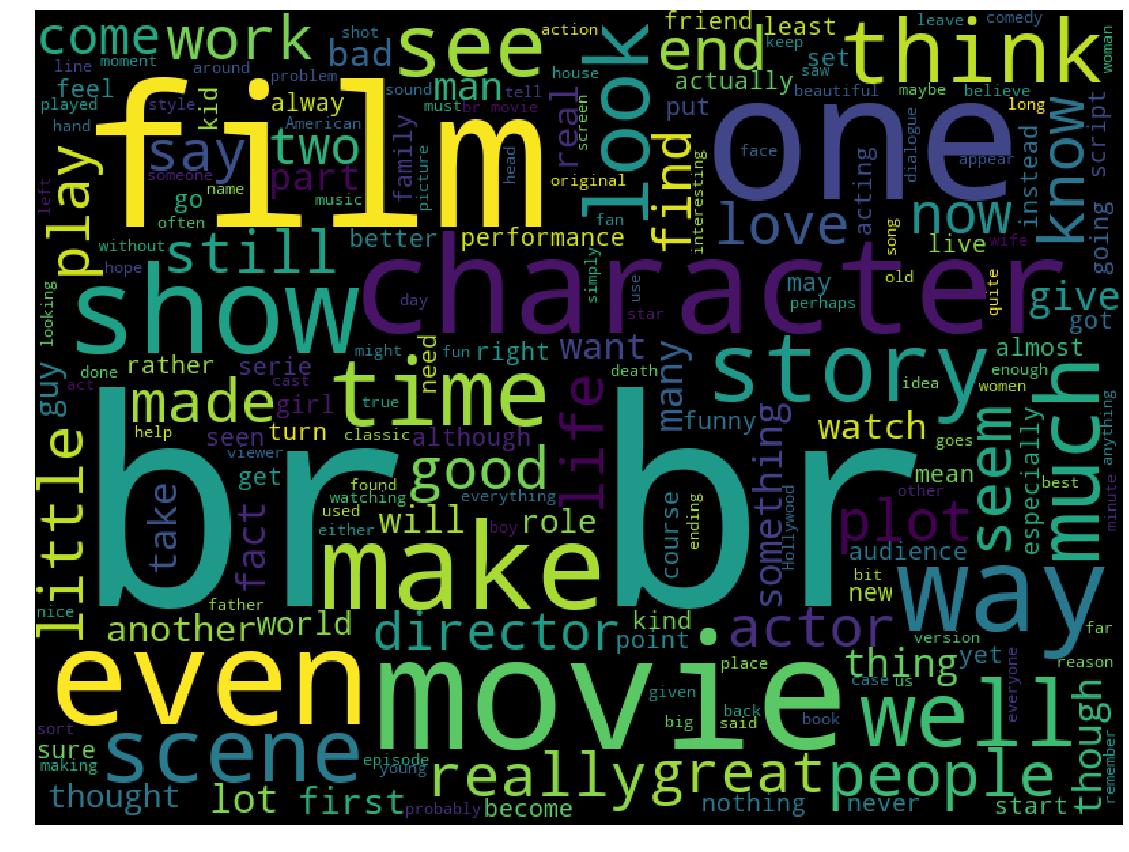

In [46]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

### 2.5 neg&pos distribution

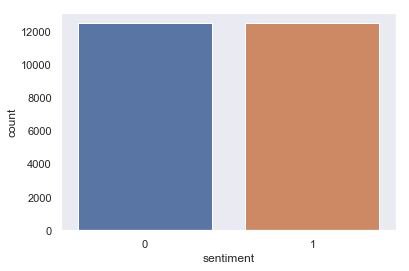

In [49]:
sns.countplot(train_data['sentiment'])

In [50]:
train_data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

### 2.6 Distribution of number of word

In [51]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

(array([1.7667e+04, 5.3280e+03, 1.3930e+03, 5.2400e+02, 7.3000e+01,
        8.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  10.,  256.,  502.,  748.,  994., 1240., 1486., 1732., 1978.,
        2224., 2470.]),
 <a list of 10 Patch objects>)

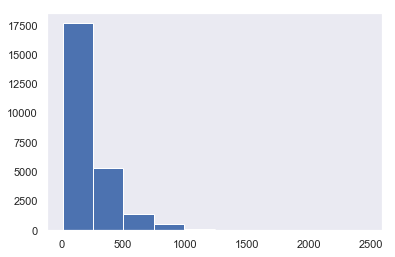

In [67]:
plt.hist(train_word_counts)

Text(0, 0.5, 'Number of reviews')

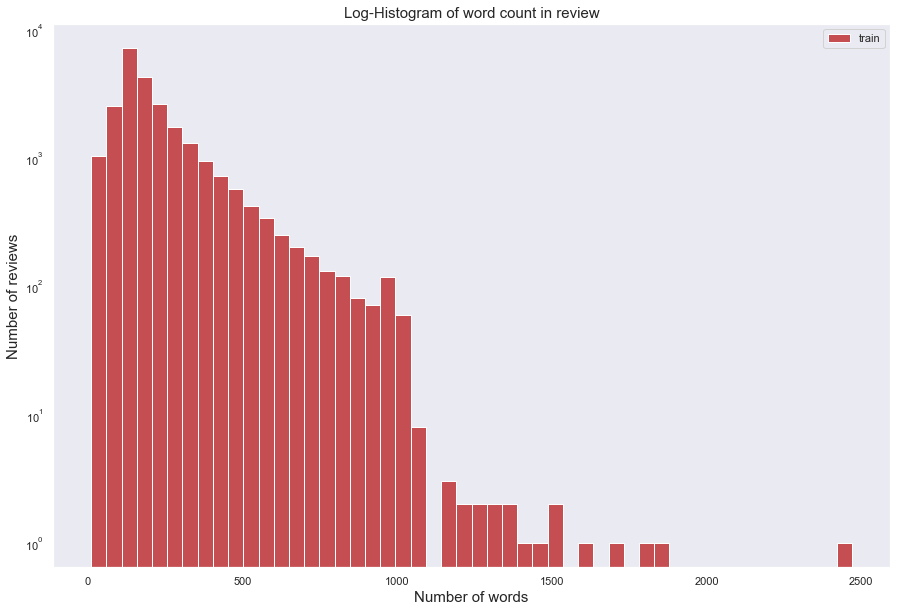

In [65]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50,  color='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words',fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

##### Other statistics

In [66]:
print('Max: {}'.format(np.max(train_word_counts)))
print('Min: {}'.format(np.min(train_word_counts)))
print('Mean: {:.2f}'.format(np.mean(train_word_counts)))
print('Median: {}'.format(np.median(train_word_counts)))
print('Std: {:.2f}'.format(np.std(train_word_counts)))

print('1th quantile: {}'.format(np.percentile(train_word_counts, 25)))
print('3th quantile: {}'.format(np.percentile(train_word_counts, 75)))

Max: 2470
Min: 10
Mean: 233.79
Median: 174.0
Std: 173.74
1th quantile: 127.0
3th quantile: 284.0


### 2.7 Ratio of capital or small or others

In [85]:
train_data['review'].apply(lambda x: '?' in x).head()

0     True
1    False
2    False
3     True
4     True
Name: review, dtype: bool

In [90]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

print("Question mark: {:.2f}%".format(qmarks*100))
print("Full stop: {:.2f}%".format(fullstop*100))
print("Capital first: {}%".format(capital_first*100))
print("Capitals: {:.2f}%".format(capitals*100))
print("Number: {:.2f}%".format(numbers*100))

Question mark: 29.55%
Full stop: 99.69%
Capital first: 0.0%
Capitals: 99.59%
Number: 56.66%
